## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">Import Libraries</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
from datetime import datetime
dt = datetime.today()
#for displaying 500 results in pandas dataframe
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, auc, roc_curve, roc_auc_score, balanced_accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")



## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">1. Read and Explain Dataset</div>

In [2]:
#Read input data
df = pd.read_csv('Data/loan_default_data.csv')
#print dataset
print("Input Dataset shape:",df.shape)
df.head(6)

Input Dataset shape: (233154, 41)


UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE DISBURSAL_DATE  STATE_ID  EMPLOYEE_CODE_ID  MOBILENO_AVL_FLAG  AADHAR_FLAG  PAN_FLAG  VOTERID_FLAG  DRIVING_FLAG  PASSPORT_FLAG  PERFORM_CNS_SCORE PERFORM_CNS_SCORE_DESCRIPTION  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS AVERAGE_ACCT_AGE CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT
0    420825             50578       58400  89.55         67        22807               45                1441    01-01-1984        Salaried     03-08-2018         6              1998                  1            1         0             0             0              0                  0   No Bureau History Available                0                 0                  0                    0                      0                     0                0                 0                  0                    0                      0                     0                   0               0                             0                                    0        0yrs 0mon             0yrs 0mon                0             0
1    537409             47145       65550  73.23         67        22807               45                1502    31-07-1985   Self employed     26-09-2018         6              1998                  1            1         0             0             0              0                598                 I-Medium Risk                1                 1                  1                27600                  50200                 50200                0                 0                  0                    0                      0                     0                1991               0                             0                                    1       1yrs 11mon            1yrs 11mon                0             1
2    417566             53278       61360  89.63         67        22807               45                1497    24-08-1985   Self employed     01-08-2018         6              1998                  1            1         0             0             0              0                  0   No Bureau History Available                0                 0                  0                    0                      0                     0                0                 0                  0                    0                      0                     0                   0               0                             0                                    0        0yrs 0mon             0yrs 0mon                0             0
3    624493             57513       66113  88.48         67        22807               45                1501    30-12-1993   Self employed     26-10-2018         6              1998                  1            1         0             0             0              0                305              L-Very High Risk                3                 0                  0                    0                      0                     0                0                 0                  0                    0                      0                     0                  31               0                             0                                    0        0yrs 8mon             1yrs 3mon                1             1
4    539055             52378       60300  88.39         67        22807               45                1495    09-12-1977   Self employed     26-09-2018         6              1998                  1            1         0             0             0              0                  0   No Bureau History Available                0                 0  

<div style="background-color: #ddefdd; padding: 10px; border-radius: 10px; color: #007d3c; text-align: center; box-shadow: 0 4px 8px rgba(0, 0, 0, 0.1);">
    <h1 style="font-size: 24px;">Feature Descriptions</h1>
</div>

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<ul>
    <li><b>UniqueID:</b> Identifier for customers.</li>
    <li><b>disbursed_amount:</b> Amount of Loan disbursed.</li>
    <li><b>asset_cost:</b> Cost of the Asset.</li>
    <li><b>ltv:</b> Loan to Value of the asset.</li>
    <li><b>branch_id:</b> Branch where the loan was disbursed.</li>
    <li><b>supplier_id:</b> Vehicle Dealer where the loan was disbursed.</li>
    <li><b>manufacturer_id:</b> Vehicle manufacturer (Hero, Honda, TVS etc.).</li>
    <li><b>Current_pincode:</b> Current pincode of the customer.</li>
    <li><b>Date.of.Birth:</b> Date of birth of the customer.</li>
    <li><b>Employment.Type:</b> Employment Type of the customer (Salaried/Self Employed).</li>
    <li><b>DisbursalDate:</b> Date of disbursement.</li>
    <li><b>State_ID:</b> State of disbursement.</li>
    <li><b>Employee_code_ID:</b> Employee of the organization who logged the disbursement.</li>
    <li><b>MobileNo_Avl_Flag:</b> If Mobile no. was shared by the customer then flagged as 1.</li>
    <li><b>Aadhar_flag:</b> If aadhar was shared by the customer then flagged as 1.</li>
    <li><b>PAN_flag:</b> If pan was shared by the customer then flagged as 1.</li>
    <li><b>VoterID_flag:</b> If voter ID was shared by the customer then flagged as 1.</li>
    <li><b>Driving_flag:</b> If DL was shared by the customer then flagged as 1.</li>
    <li><b>Passport_flag:</b> If passport was shared by the customer then flagged as 1.</li>
    <li><b>PERFORM_CNS.SCORE:</b> Bureau Score.</li>
    <li><b>PERFORM_CNS.SCORE.DESCRIPTION:</b> Bureau score description.</li>
    <li><b>PRI.NO.OF.ACCTS:</b> Count of total loans taken by the customer at the time of disbursement.</li>
    <li><b>PRI.ACTIVE.ACCTS:</b> Count of active loans taken by the customer at the time of disbursement.</li>
    <li><b>PRI.OVERDUE.ACCTS:</b> Count of default accounts at the time of disbursement.</li>
    <li><b>PRI.CURRENT.BALANCE:</b> Total Principal outstanding amount of the active loans at the time of disbursement.</li>
    <li><b>PRI.SANCTIONED.AMOUNT:</b> Total amount that was sanctioned for all the loans at the time of disbursement.</li>
    <li><b>PRI.DISBURSED.AMOUNT:</b> Total amount that was disbursed for all the loans at the time of disbursement.</li>
    <li><b>SEC.NO.OF.ACCTS:</b> Count of total loans taken by the customer at the time of disbursement.</li>
    <li><b>SEC.ACTIVE.ACCTS:</b> Count of active loans taken by the customer at the time of disbursement.</li>
    <li><b>SEC.OVERDUE.ACCTS:</b> Count of default accounts at the time of disbursement.</li>
    <li><b>SEC.CURRENT.BALANCE:</b> Total Principal outstanding amount of the active loans at the time of disbursement.</li>
    <li><b>SEC.SANCTIONED.AMOUNT:</b> Total amount that was sanctioned for all the loans at the time of disbursement.</li>
    <li><b>SEC.DISBURSED.AMOUNT:</b> Total amount that was disbursed for all the loans at the time of disbursement.</li>
    <li><b>PRIMARY.INSTAL.AMT:</b> EMI Amount of the primary loan.</li>
    <li><b>SEC.INSTAL.AMT:</b> EMI Amount of the secondary loan.</li>
    <li><b>NEW.ACCTS.IN.LAST.SIX.MONTHS:</b> New loans taken by the customer in the last 6 months before the disbursement.</li>
    <li><b>DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS:</b> Loans defaulted in the last 6 months.</li>
    <li><b>AVERAGE.ACCT.AGE:</b> Average loan tenure.</li>
    <li><b>CREDIT.HISTORY.LENGTH:</b> Time since first loan.</li>
    <li><b>NO.OF_INQUIRIES:</b> Inquiries done by the customer for loans.</li>
    <li><b>LOAN_DEFAULT:</b> Payment default in the first EMI on the due date.</li>
</ul>
</div>

## <div style="border-radius:0px; border:#3eb489 solid; padding: 15px; background-color: #ddefdd; font-size:100%; text-align:center">2. Data Pre-processing & EDA</div>

In [3]:
df.describe()

UNIQUEID  DISBURSED_AMOUNT    ASSET_COST            LTV      BRANCH_ID    SUPPLIER_ID  MANUFACTURER_ID  CURRENT_PINCODE_ID       STATE_ID  EMPLOYEE_CODE_ID  MOBILENO_AVL_FLAG   AADHAR_FLAG       PAN_FLAG   VOTERID_FLAG   DRIVING_FLAG  PASSPORT_FLAG  PERFORM_CNS_SCORE  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  NO_OF_INQUIRIES   LOAN_DEFAULT
count  233154.000000     233154.000000  2.331540e+05  233154.000000  233154.000000  233154.000000    233154.000000       233154.000000  233154.000000     233154.000000           233154.0  233154.00000  233154.000000  233154.000000  233154.000000  233154.000000      233154.000000    233154.000000     233154.000000      233154.000000         2.331540e+05           2.331540e+05          2.331540e+05    233154.000000     233154.000000      233154.000000         2.331540e+05           2.331540e+05          2.331540e+05        2.331540e+05    2.331540e+05                 233154.000000                        233154.000000    233154.000000  233154.000000
mean   535917.573376      54356.993528  7.586507e+04      74.746530      72.936094   19638.635035        69.028054         3396.880247       7.262243       1549.477148                1.0       0.84032       0.075577       0.144943       0.023242       0.002127         289.462994         2.440636          1.039896           0.156549         1.659001e+05           2.185039e+05          2.180659e+05         0.059081          0.027703           0.007244         5.427793e+03           7.295923e+03          7.179998e+03        1.310548e+04    3.232684e+02                      0.381833                             0.097481         0.206615       0.217071
std     68315.693711      12971.314171  1.894478e+04      11.456636      69.834995    3491.949566        22.141304         2238.147502       4.482230        975.261278                0.0       0.36631       0.264320       0.352044       0.150672       0.046074         338.374779         5.217233          1.941496           0.548787         9.422736e+05           2.374794e+06          2.377744e+06         0.626795          0.316057           0.111079         1.702370e+05           1.831560e+05          1.825925e+05        1.513679e+05    1.555369e+04                      0.955107                             0.384439         0.706498       0.412252
min    417428.000000      13320.000000  3.700000e+04      10.030000       1.000000   10524.000000        45.000000            1.000000       1.000000          1.000000                1.0       0.00000       0.000000       0.000000       0.000000       0.000000           0.000000         0.000000          0.000000           0.000000        -6.678296e+06           0.000000e+00          0.000000e+00         0.000000          0.000000           0.000000        -5.746470e+05           0.000000e+00          0.000000e+00        0.000000e+00    0.000000e+00                      0.000000                             0.000000         0.000000       0.000000
25%    476786.250000      47145.000000  6.571700e+04      68.880000      14.000000   16535.000000        48.000000         1511.000000       4.000000        713.000000                1.0       1.00000       0.000000       0.000000       0.000000       0.000000           0.000000         0.000000          0.000000           0.000000         0.000000e+00           0.000000e+00          0.000000e+00         0.000000          0.000000           0.000000         0.000000e+00           0.000000e+00          0.000000e+00        0.000000e+00    0.000000e+00                      0.000000                             0.000000         0.000000       0.000000
50%    535978.500000      53803.000000  7.094600e+04      76.800000      61.000000

In [4]:
#check null values in the dataset
null= df.isnull().sum().sort_values(ascending=False)
total =df.shape[0]
#calculate missing percent
percent_missing= (df.isnull().sum()/total).sort_values(ascending=False)

missing_data= pd.concat([null, percent_missing], axis=1, keys=['Total missing', 'Percent missing'])

missing_data.reset_index(inplace=True)
missing_data= missing_data.rename(columns= { "index": " column name"})
 
print ("Null Values in each column:\n", missing_data.sort_values(by ='Total missing', ascending = False))

Null Values in each column:
                             column name  Total missing  Percent missing
0                       EMPLOYMENT_TYPE           7661         0.032858
21        PERFORM_CNS_SCORE_DESCRIPTION              0         0.000000
23                       DISBURSAL_DATE              0         0.000000
24                           ASSET_COST              0         0.000000
25                                  LTV              0         0.000000
26                            BRANCH_ID              0         0.000000
27                          SUPPLIER_ID              0         0.000000
28                      MANUFACTURER_ID              0         0.000000
29                   CURRENT_PINCODE_ID              0         0.000000
30                        DATE_OF_BIRTH              0         0.000000
31                             STATE_ID              0         0.000000
32                    PERFORM_CNS_SCORE              0         0.000000
33                     EMPLOYEE_COD

In [5]:
# Lets check the unique columns in Employment_type
print(df.EMPLOYMENT_TYPE .unique())


['Salaried' 'Self employed' nan]


<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>Data Imputation for nan value in Employment_type column with Missing</b>
 </div>


In [6]:
df['EMPLOYMENT_TYPE'] = df['EMPLOYMENT_TYPE'].fillna("Missing")
print(df.EMPLOYMENT_TYPE .unique())


['Salaried' 'Self employed' 'Missing']


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UNIQUEID                             233154 non-null  int64  
 1   DISBURSED_AMOUNT                     233154 non-null  int64  
 2   ASSET_COST                           233154 non-null  int64  
 3   LTV                                  233154 non-null  float64
 4   BRANCH_ID                            233154 non-null  int64  
 5   SUPPLIER_ID                          233154 non-null  int64  
 6   MANUFACTURER_ID                      233154 non-null  int64  
 7   CURRENT_PINCODE_ID                   233154 non-null  int64  
 8   DATE_OF_BIRTH                        233154 non-null  object 
 9   EMPLOYMENT_TYPE                      233154 non-null  object 
 10  DISBURSAL_DATE                       233154 non-null  object 
 11  STATE_ID     

In [8]:
print("Average loan tenure:",df['AVERAGE_ACCT_AGE'].iloc[1])
print("Credit history:",df['CREDIT_HISTORY_LENGTH'].iloc[4])
print("Date of Birth:",df['DATE_OF_BIRTH'].iloc[1])
print("Disbursal date:",df['DISBURSAL_DATE'].iloc[1])


Average loan tenure: 1yrs 11mon
Credit history: 0yrs 0mon
Date of Birth: 31-07-1985
Disbursal date: 26-09-2018


<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<ul>
    <li>AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH:are object, but they should be float(yrs).Lets format this properly </li>
    <li>DATE_OF_BIRTH,DISBURSAL_DATE:are object,should be datetime </li>
</ul>
</div>


In [9]:
#Separate the year and month from the AVERAGE_ACCT_AGE column
df[['AVERAGE_ACCT_Yr','AVERAGE_ACCT_Month']] = df['AVERAGE_ACCT_AGE'].str.split("yrs",expand=True)
df['AVERAGE_ACCT_Month'] = df['AVERAGE_ACCT_Month'].str.split("mon",expand=True)
df["AVERAGE_ACCT_AGE"]= df["AVERAGE_ACCT_Yr"].astype(str).astype(int)+((df["AVERAGE_ACCT_Month"].astype(str).astype(int))/12)
df= df.drop(columns= ["AVERAGE_ACCT_Yr","AVERAGE_ACCT_Month"])

#Separate the year and month from the CREDIT_HISTORY_LENGTH column
df[['CREDIT_HISTORY_LENGTH_Yr','CREDIT_HISTORY_LENGTH_Month']] = df['CREDIT_HISTORY_LENGTH'].str.split("yrs",expand=True)
df['CREDIT_HISTORY_LENGTH_Month'] = df['CREDIT_HISTORY_LENGTH_Month'].str.split("mon",expand=True)
df["CREDIT_HISTORY_LENGTH"]= df["CREDIT_HISTORY_LENGTH_Yr"].astype(str).astype(int)+((df["CREDIT_HISTORY_LENGTH_Month"].astype(str).astype(int))/12)
df= df.drop(columns= ["CREDIT_HISTORY_LENGTH_Yr","CREDIT_HISTORY_LENGTH_Month"])


In [10]:
print("Average loan tenure:",df['AVERAGE_ACCT_AGE'].iloc[1])
print("Credit history:",df['CREDIT_HISTORY_LENGTH'].iloc[4])

Average loan tenure: 1.9166666666666665
Credit history: 0.0


In [11]:
#Convert the columns to datetime
df['DATE_OF_BIRTH'] =  pd.to_datetime(df['DATE_OF_BIRTH'], format='%d-%m-%Y')
df['DISBURSAL_DATE'] =  pd.to_datetime(df['DISBURSAL_DATE'], format='%d-%m-%Y')
print("Average loan tenure:",df['DATE_OF_BIRTH'].iloc[1])
print("Credit history:",df['DISBURSAL_DATE'].iloc[4])

Average loan tenure: 1985-07-31 00:00:00
Credit history: 2018-09-26 00:00:00


In [12]:
#Convert the columns to bool
df['AADHAR_FLAG'] = df['AADHAR_FLAG'].astype(bool)
df['PAN_FLAG'] = df['PAN_FLAG'].astype(bool)
df['VOTERID_FLAG'] = df['VOTERID_FLAG'].astype(bool)
df['DRIVING_FLAG'] = df['DRIVING_FLAG'].astype(bool)
df['PASSPORT_FLAG'] = df['PASSPORT_FLAG'].astype(bool)

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>Lets look at the class distribution of LOAN_Default which is one of our target variable </b>
 </div>

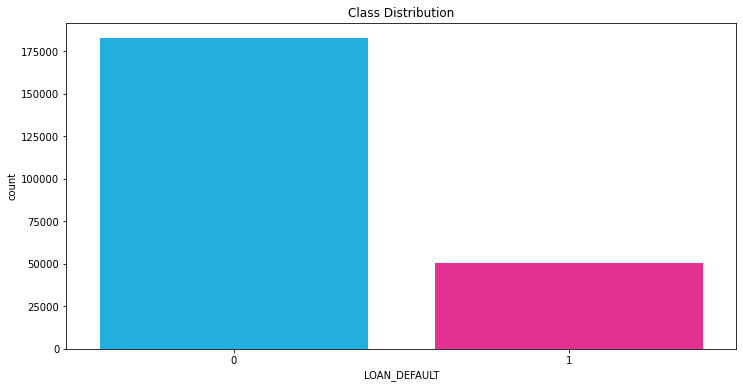

% of non defaults       : 78.29288796246257
Number of non defaults     : 182543
% of defaults         : 21.70711203753742
Number of defaults    : 50611


In [13]:
#Graph
my_pal = {0: 'deepskyblue', 1: 'deeppink'}

plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'LOAN_DEFAULT', data = df, palette = my_pal)
plt.title('Class Distribution')
plt.show()

# Count and %
Count_Non_Default = len(df[df['LOAN_DEFAULT']==0])
Count_Default = len(df[df['LOAN_DEFAULT']==1]) 
Non_Default_Percent = Count_Non_Default/(Count_Non_Default+Count_Default)
print('% of non defaults       :', Non_Default_Percent*100)
print('Number of non defaults     :', Count_Non_Default)
Default_Percent= Count_Default/(Count_Non_Default+Count_Default)
print('% of defaults         :',Default_Percent*100)
print('Number of defaults    :', Count_Default)

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>We clearly see there is class imbalance in our dataset. We can consider some methods to tackle this problem later in feature engineering.</b><br>
    <b> Lets look at some other columns which gives us more context </b>
 </div>

In [14]:
# List of columns to analyze
columns = ['EMPLOYMENT_TYPE','MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG', 'VOTERID_FLAG', 'PASSPORT_FLAG', 'DRIVING_FLAG']

# Create subplots
fig = sp.make_subplots(rows=len(columns), cols=1, subplot_titles=[f"{col} vs LOAN_DEFAULT" for col in columns])

# Add each column to the subplot
for i, column in enumerate(columns, start=1):
   # Group by column and LOAN_DEFAULT to calculate count and proportion
    grouped = df.groupby([column, "LOAN_DEFAULT"]).size().reset_index(name="count")
    total_count = grouped.groupby(column)["count"].transform("sum")
    grouped["proportion"] = grouped["count"] / total_count
    
    fig_col = px.bar(
        grouped,
        x=column,
        y="proportion",
        color="LOAN_DEFAULT",
        barmode="stack",
        text=grouped.apply(lambda row: f"{row['count']} ({row['proportion']:.2%})", axis=1),  # Count and proportion
    ).update_traces(textposition="inside")

    for trace in fig_col.data:
        fig.add_trace(trace, row=i, col=1)

# Update layout
fig.update_layout(
    height=200 * len(columns),
    title_text="Analysis of Columns vs LOAN_DEFAULT",
    showlegend=True,
    legend_title_text="LOAN_DEFAULT",
)

fig.show()


###  Lets take a look at some continuous variables

In [15]:
columns_to_plot = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV','PERFORM_CNS_SCORE','PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS']
print(df[columns_to_plot].describe())


       DISBURSED_AMOUNT    ASSET_COST            LTV  PERFORM_CNS_SCORE  PRI_NO_OF_ACCTS  PRI_OVERDUE_ACCTS
count     233154.000000  2.331540e+05  233154.000000      233154.000000    233154.000000      233154.000000
mean       54356.993528  7.586507e+04      74.746530         289.462994         2.440636           0.156549
std        12971.314171  1.894478e+04      11.456636         338.374779         5.217233           0.548787
min        13320.000000  3.700000e+04      10.030000           0.000000         0.000000           0.000000
25%        47145.000000  6.571700e+04      68.880000           0.000000         0.000000           0.000000
50%        53803.000000  7.094600e+04      76.800000           0.000000         0.000000           0.000000
75%        60413.000000  7.920175e+04      83.670000         678.000000         3.000000           0.000000
max       990572.000000  1.628992e+06      95.000000         890.000000       453.000000          25.000000


In [16]:
def binning_by_depth_factor(df_column, factor):
    divs, max_da, min_da= round(np.sqrt(len(df_column))/factor), df_column.max(), df_column.min()
    step = (max_da - min_da)/divs
    return (df_column/step).astype(int)*divs

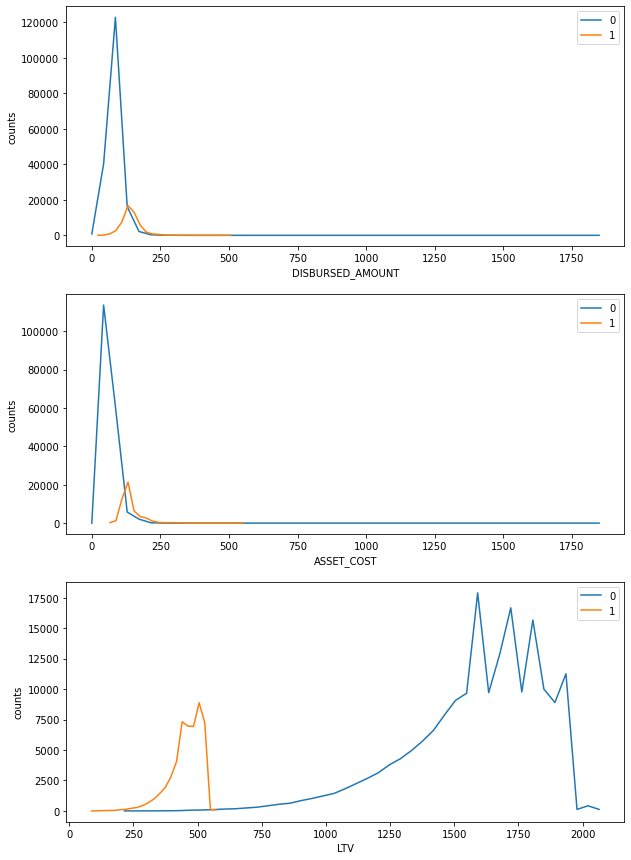

In [17]:
cols = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV']
fig, axs = plt.subplots(len(cols), figsize=(10, 5*len(cols)))

for j, col in enumerate(cols):
    for i, (val, group) in enumerate(df.groupby('LOAN_DEFAULT')):
        column = binning_by_depth_factor(group[col], 10) 
        column.value_counts().to_frame('counts').reset_index().sort_values('index').plot(x='index', y='counts', label=val, ax=axs[j])
        axs[j].set_xlabel(col)
        axs[j].set_ylabel('counts')

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<ul>
    <li><b>Disbursed amount and asset cost in both both classes is showing gaussian distribution </b><br></li>
    <li><b> This shows that the defaulters are defaulting mostly in lesser amounts of loan and for lesser asset costs. </b><br></li>
    <li> <b>Additionally as expected, lower LTV value customers are also defaulting.</b> </li>
 </ul>
    
 </div>




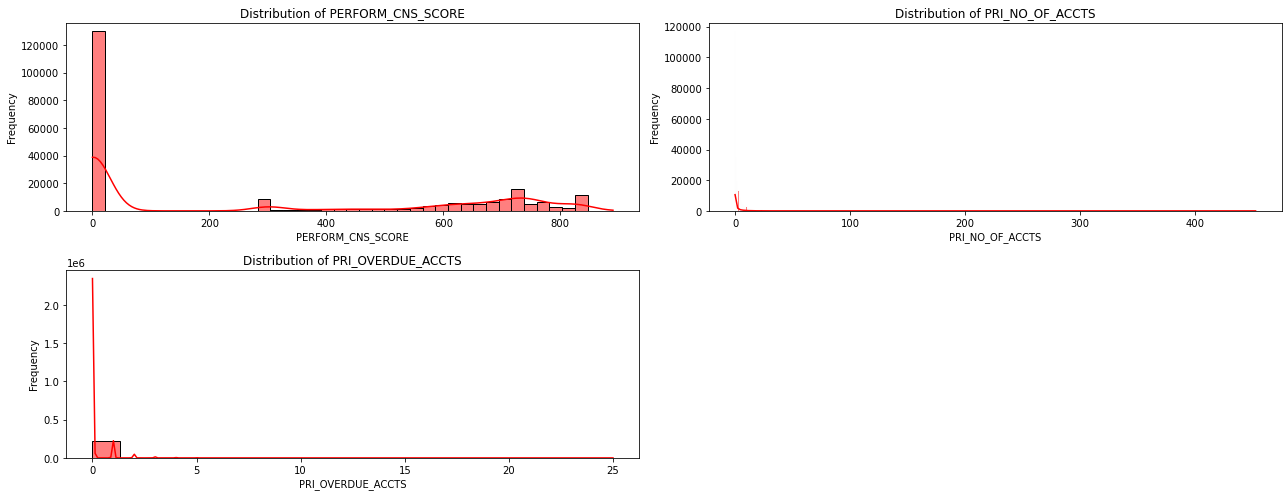

In [18]:
# Create separate distribution plots
columns_to_plot = ['PERFORM_CNS_SCORE','PRI_NO_OF_ACCTS','PRI_OVERDUE_ACCTS']
plt.figure(figsize=(18,10))  # Set the overall figure size
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 2, i)  # Create subplots
    sns.histplot(df[column], kde=True, color='red',edgecolor='black')  # Distribution + KDE
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()  # Adjust layout to avoid overlap
plt.show()

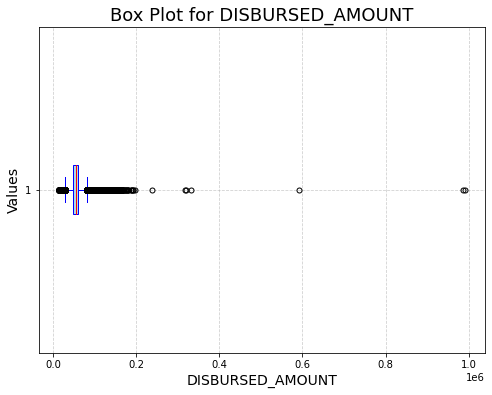

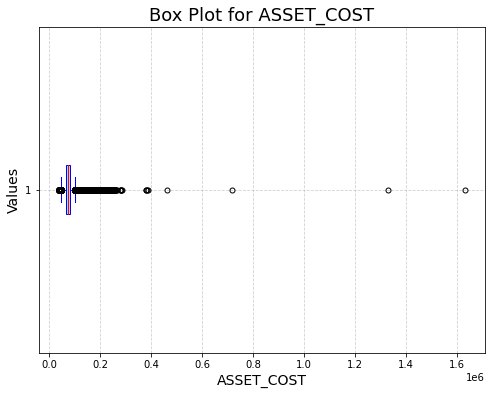

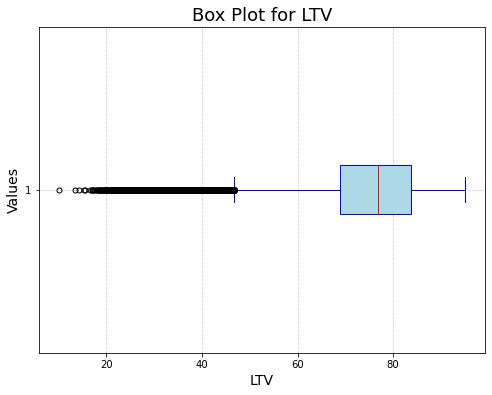

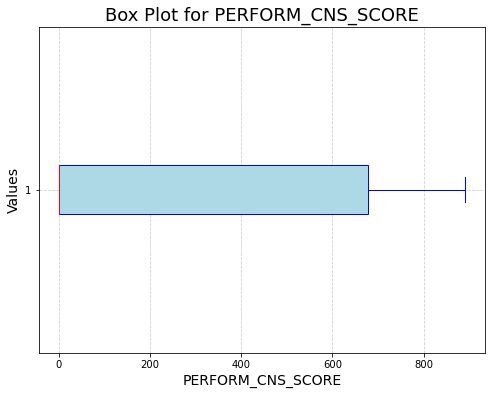

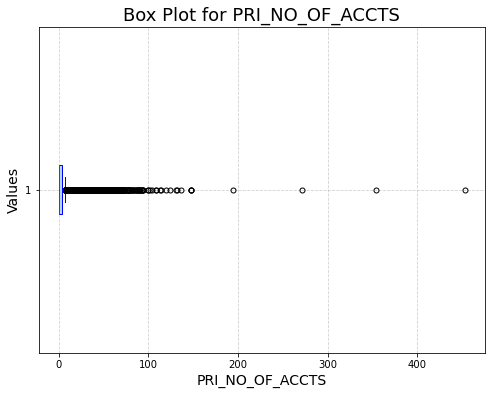

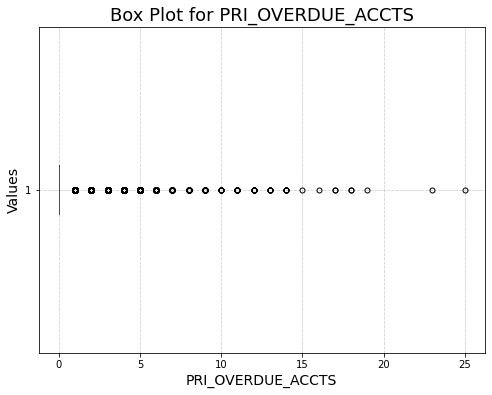

In [19]:
columns_to_plot = ['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'PERFORM_CNS_SCORE', 'PRI_NO_OF_ACCTS', 'PRI_OVERDUE_ACCTS']

for column in columns_to_plot:
    plt.figure(figsize=(8, 6))
    
    # Create a box plot
    plt.boxplot(
        df[column],
        vert=False,
        patch_artist=True,  # Fill the boxes with color
        boxprops=dict(facecolor='lightblue', color='blue'),  # Box color
        whiskerprops=dict(color='blue'),  # Whisker color
        capprops=dict(color='blue'),  # Cap color
        medianprops=dict(color='red'),  # Median line color
        flierprops=dict(marker='o', color='red', markersize=5)  # Outlier style
    )
    
    # Add labels and title
    plt.title(f"Box Plot for {column}", fontsize=18)
    plt.ylabel("Values", fontsize=14)
    plt.xlabel(column, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)  # Add grid for better readability
    
    # Show the plot
    plt.show()


<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>Lets check the number of outliers and tackle these observed ones by impute them with the mean </b>
 </div>

In [20]:
#To check number of outlier data
def outlier_data(df, features):
    for feature in features:
        print(f"Feature: {feature}")
        
        # Number of observations in the column
        obs = len(df[feature])
        print("No. of observations in column: ", obs)
        
        # Calculate summary statistics
        data_mean, data_std = np.mean(df[feature]), np.std(df[feature])
        print('Statistics: Mean=%.3f, Std dev=%.3f' % (data_mean, data_std))
        
        # Identify outliers
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off
        outliers = [x for x in df[feature] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        print("-" * 50)  # Separator for readability




In [21]:
#Checking outliers
outlier_data(df, columns_to_plot)

Feature: DISBURSED_AMOUNT
No. of observations in column:  233154
Statistics: Mean=54356.994, Std dev=12971.286
Identified outliers: 3076
--------------------------------------------------
Feature: ASSET_COST
No. of observations in column:  233154
Statistics: Mean=75865.068, Std dev=18944.741
Identified outliers: 4425
--------------------------------------------------
Feature: LTV
No. of observations in column:  233154
Statistics: Mean=74.747, Std dev=11.457
Identified outliers: 2745
--------------------------------------------------
Feature: PERFORM_CNS_SCORE
No. of observations in column:  233154
Statistics: Mean=289.463, Std dev=338.374
Identified outliers: 0
--------------------------------------------------
Feature: PRI_NO_OF_ACCTS
No. of observations in column:  233154
Statistics: Mean=2.441, Std dev=5.217
Identified outliers: 4119
--------------------------------------------------
Feature: PRI_OVERDUE_ACCTS
No. of observations in column:  233154
Statistics: Mean=0.157, Std dev=0.

In [22]:
def impute_outlier(df, features):
    for feature in features:
        # Calculate mean and thresholds for outlier detection
        data_mean = np.mean(df[feature])
        data_std = np.std(df[feature])
        cut_off = data_std * 3
        lower, upper = data_mean - cut_off, data_mean + cut_off

        # Create a new column with `_new` suffix
        df[f"{feature}"] = df[feature].apply(
            lambda x: data_mean if x < lower or x > upper else x
        )

    return df


In [23]:
# Apply the function
df = impute_outlier(df, columns_to_plot)


In [24]:
#Additional columns which is useful for business sense 
df['APPLICANT_AGE'] = ((dt - df['DATE_OF_BIRTH']) / 365).apply(lambda x: float(x.days))
df['DISBURSAL_AGE'] = ((dt - df['DISBURSAL_DATE']) / 365).apply(lambda x: float(x.days))

In [25]:
df

UNIQUEID  DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE DISBURSAL_DATE  STATE_ID  EMPLOYEE_CODE_ID  MOBILENO_AVL_FLAG  AADHAR_FLAG  PAN_FLAG  VOTERID_FLAG  DRIVING_FLAG  PASSPORT_FLAG  PERFORM_CNS_SCORE PERFORM_CNS_SCORE_DESCRIPTION  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_SANCTIONED_AMOUNT  PRI_DISBURSED_AMOUNT  SEC_NO_OF_ACCTS  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_SANCTIONED_AMOUNT  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  AVERAGE_ACCT_AGE  CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT  APPLICANT_AGE  DISBURSAL_AGE
0         420825           50578.0     58400.0  89.55         67        22807               45                1441    1984-01-01        Salaried     2018-08-03         6              1998                  1         True     False         False         False          False                  0   No Bureau History Available              0.0                 0                0.0                    0                      0                     0                0                 0                  0                    0                      0                     0                   0               0                             0                                    0          0.000000               0.000000                0             0           41.0            6.0
1         537409           47145.0     65550.0  73.23         67        22807               45                1502    1985-07-31   Self employed     2018-09-26         6              1998                  1         True     False         False         False          False                598                 I-Medium Risk              1.0                 1                1.0                27600                  50200                 50200                0                 0                  0                    0                      0                     0                1991               0                             0                                    1          1.916667               1.916667                0             1           39.0            6.0
2         417566           53278.0     61360.0  89.63         67        22807               45                1497    1985-08-24   Self employed     2018-08-01         6              1998                  1         True     False         False         False          False                  0   No Bureau History Available              0.0                 0                0.0                    0                      0                     0                0                 0                  0                    0                      0                     0                   0               0                             0                                    0          0.000000               0.000000                0             0           39.0            6.0
3         624493           57513.0     66113.0  88.48         67        22807               45                1501    1993-12-30   Self employed     2018-10-26         6              1998                  1         True     False         False         False          False                305              L-Very High Risk              3.0                 0                0.0                    0                      0                     0                0                 0                  0                    0                      0                     0                  31               0                             0                                    0          0.666667               1.250000                1             1           31.0            6.0
4         539055           52378.0     60300.0  88.39         67        22807               45                1495    1977-12-09   Self employed     2018-09-26         6    

In [26]:
df.groupby('PERFORM_CNS_SCORE_DESCRIPTION').agg({
    'PERFORM_CNS_SCORE':[np.min,np.max]
}).sort_values(('PERFORM_CNS_SCORE','amin'))

PERFORM_CNS_SCORE     
                                                                amin amax
PERFORM_CNS_SCORE_DESCRIPTION                                            
No Bureau History Available                                        0    0
Not Scored: More than 50 active Accounts found                    11   11
Not Scored: Only a Guarantor                                      14   14
Not Scored: Sufficient History Not Available                      15   15
Not Scored: No Activity seen on the customer (I...                16   16
Not Scored: Not Enough Info available on the cu...                17   17
Not Scored: No Updates available in last 36 months                18   18
M-Very High Risk                                                 300  300
L-Very High Risk                                                 301  350
K-High Risk                                                      351  520
J-High Risk                                                      521  570
I-Medium Risk                                                    571  600
H-Medium Risk                                                    601  630
G-Low Risk                                                       631  650
F-Low Risk                                                       651  680
E-Low Risk                                                       681  705
D-Very Low Risk                                                  706  735
C-Very Low Risk                                                  736  760
B-Very Low Risk                                                  761  805
A-Very Low Risk                                                  806  890

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>PERFORM_CNS_SCORE_DESCRIPTION is a bucket label for PERFORM_CNS_SCORE so we can drop it. </b>
 </div>


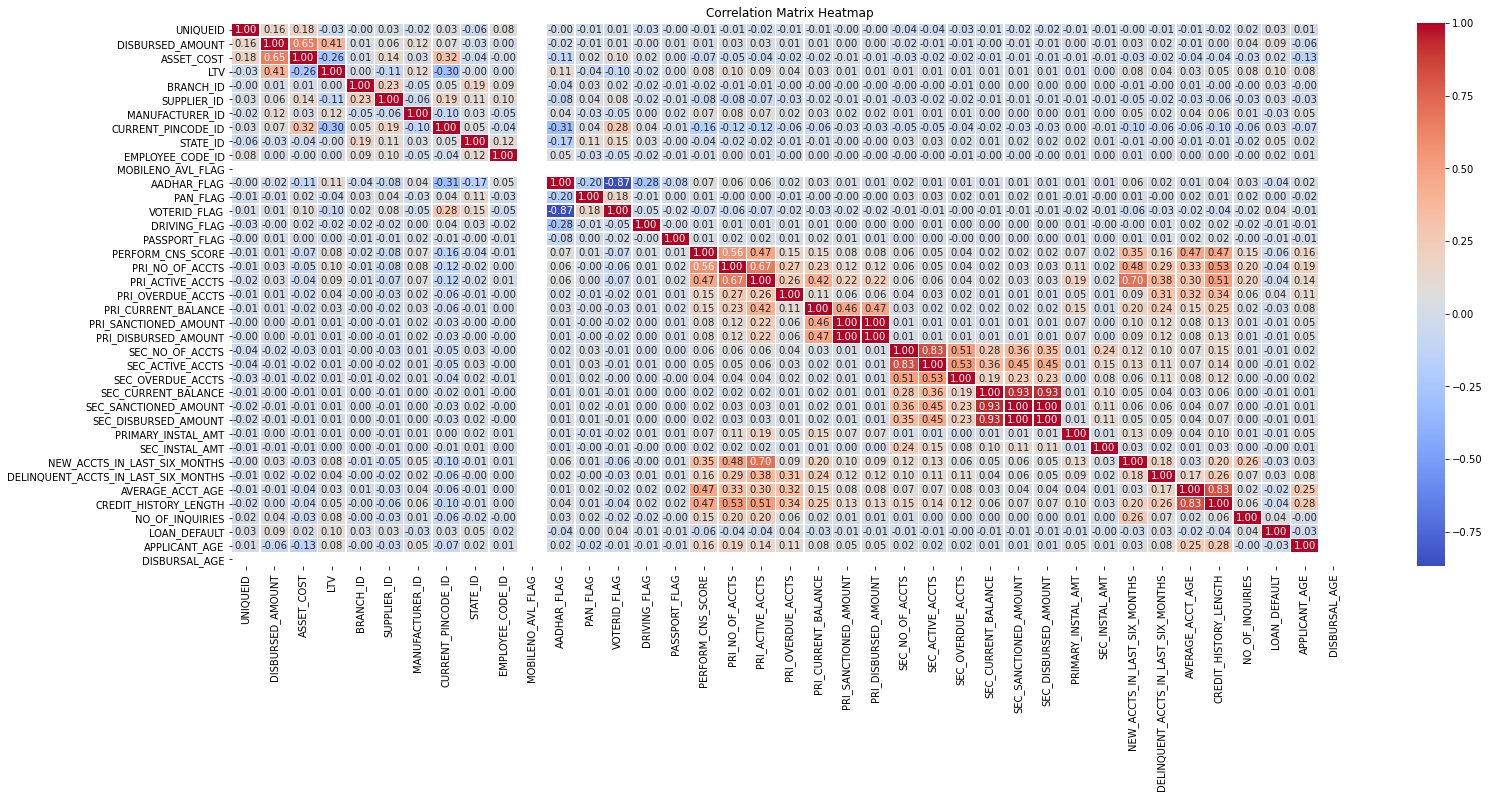

In [27]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [28]:
target_corr = corr_matrix["LOAN_DEFAULT"].sort_values(ascending=False)
print(target_corr)

LOAN_DEFAULT                           1.000000
LTV                                    0.097300
DISBURSED_AMOUNT                       0.088120
STATE_ID                               0.048075
VOTERID_FLAG                           0.043747
NO_OF_INQUIRIES                        0.043678
PRI_OVERDUE_ACCTS                      0.041582
DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS    0.034462
UNIQUEID                               0.033848
BRANCH_ID                              0.030193
CURRENT_PINCODE_ID                     0.028419
SUPPLIER_ID                            0.027357
EMPLOYEE_CODE_ID                       0.020657
ASSET_COST                             0.018521
PAN_FLAG                               0.002046
SEC_OVERDUE_ACCTS                     -0.001371
SEC_INSTAL_AMT                        -0.001548
SEC_CURRENT_BALANCE                   -0.005531
DRIVING_FLAG                          -0.005821
SEC_ACTIVE_ACCTS                      -0.005993
SEC_DISBURSED_AMOUNT                  -0

In [29]:
# Identify pairs with high correlation
corr_df = df.corr()
for col in corr_df.columns:
    correlated_fields = list(filter(lambda x: x!=col, corr_df[(np.abs(corr_df[col])>.75)][col].index.values))
    correlated_values = list(filter(lambda x: x!=col, corr_df[(np.abs(corr_df[col])>.75)][col].values))
    if correlated_fields:
        print(col, ':', ', '.join(map(str, zip(correlated_fields, correlated_values))), sep='\t')

AADHAR_FLAG	:	('VOTERID_FLAG', 1.0)
VOTERID_FLAG	:	('AADHAR_FLAG', -0.8692589324351712)
PRI_SANCTIONED_AMOUNT	:	('PRI_DISBURSED_AMOUNT', 1.0)
PRI_DISBURSED_AMOUNT	:	('PRI_SANCTIONED_AMOUNT', 0.9987472745629682)
SEC_NO_OF_ACCTS	:	('SEC_ACTIVE_ACCTS', 1.0)
SEC_ACTIVE_ACCTS	:	('SEC_NO_OF_ACCTS', 0.8287265545845726)
SEC_CURRENT_BALANCE	:	('SEC_SANCTIONED_AMOUNT', 1.0), ('SEC_DISBURSED_AMOUNT', 0.9291958484455546)
SEC_SANCTIONED_AMOUNT	:	('SEC_CURRENT_BALANCE', 0.9291958484455546), ('SEC_DISBURSED_AMOUNT', 1.0)
SEC_DISBURSED_AMOUNT	:	('SEC_CURRENT_BALANCE', 0.9299951942626924), ('SEC_SANCTIONED_AMOUNT', 0.9996464157147403)
AVERAGE_ACCT_AGE	:	('CREDIT_HISTORY_LENGTH', 1.0)
CREDIT_HISTORY_LENGTH	:	('AVERAGE_ACCT_AGE', 0.831951596938287)


> From the above, we can remove the below columns from the feature set to avoid multicollinearity
> - VOTERID_FLAG
> - PRI_SANCTIONED_AMOUNT
> - SEC_NO_OF_ACCTS
> - SEC_SANCTIONED_AMOUNT
> - AVERAGE_ACCT_AGE <br>
> Additional columns we can drop are 
> - 'DATE_OF_BIRTH', 'DISBURSAL_DATE','MOBILENO_AVL_FLAG','UNIQUEID','PERFORM_CNS_SCORE_DESCRIPTION'


In [30]:
columns_to_drop = ['VOTERID_FLAG','PRI_SANCTIONED_AMOUNT','SEC_NO_OF_ACCTS','SEC_SANCTIONED_AMOUNT','AVERAGE_ACCT_AGE','DATE_OF_BIRTH', 'DISBURSAL_DATE','MOBILENO_AVL_FLAG','UNIQUEID','PERFORM_CNS_SCORE_DESCRIPTION']
df = df.drop(columns_to_drop,axis=1)

In [31]:
df.head()

DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  MANUFACTURER_ID  CURRENT_PINCODE_ID EMPLOYMENT_TYPE  STATE_ID  EMPLOYEE_CODE_ID  AADHAR_FLAG  PAN_FLAG  DRIVING_FLAG  PASSPORT_FLAG  PERFORM_CNS_SCORE  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_DISBURSED_AMOUNT  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT  APPLICANT_AGE  DISBURSAL_AGE
0           50578.0     58400.0  89.55         67        22807               45                1441        Salaried         6              1998         True     False         False          False                  0              0.0                 0                0.0                    0                     0                 0                  0                    0                     0                   0               0                             0                                    0               0.000000                0             0           41.0            6.0
1           47145.0     65550.0  73.23         67        22807               45                1502   Self employed         6              1998         True     False         False          False                598              1.0                 1                1.0                27600                 50200                 0                  0                    0                     0                1991               0                             0                                    1               1.916667                0             1           39.0            6.0
2           53278.0     61360.0  89.63         67        22807               45                1497   Self employed         6              1998         True     False         False          False                  0              0.0                 0                0.0                    0                     0                 0                  0                    0                     0                   0               0                             0                                    0               0.000000                0             0           39.0            6.0
3           57513.0     66113.0  88.48         67        22807               45                1501   Self employed         6              1998         True     False         False          False                305              3.0                 0                0.0                    0                     0                 0                  0                    0                     0                  31               0                             0                                    0               1.250000                1             1           31.0            6.0
4           52378.0     60300.0  88.39         67        22807               45                1495   Self employed         6              1998         True     False         False          False                  0              0.0                 0                0.0                    0                     0                 0                  0                    0                     0                   0               0                             0                                    0               0.000000                1             1           47.0            6.0

<div style="background-color: #f3faf3; padding: 15px; border-radius: 10px; margin-top: 20px; text-align: left;">
<b>Let's tackle the class imbalance problem by oversampling the miniority class by SMOTE which we saw earlier was Default cases </b>
 </div>

In [32]:
df_test = df.copy()

In [33]:
# Handle categorical variables
categorical_cols = df_test.select_dtypes(include=['object', 'category']).columns
df_test = pd.get_dummies(df_test, columns=categorical_cols, drop_first=True)
df_test.head()


DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  MANUFACTURER_ID  CURRENT_PINCODE_ID  STATE_ID  EMPLOYEE_CODE_ID  AADHAR_FLAG  PAN_FLAG  DRIVING_FLAG  PASSPORT_FLAG  PERFORM_CNS_SCORE  PRI_NO_OF_ACCTS  PRI_ACTIVE_ACCTS  PRI_OVERDUE_ACCTS  PRI_CURRENT_BALANCE  PRI_DISBURSED_AMOUNT  SEC_ACTIVE_ACCTS  SEC_OVERDUE_ACCTS  SEC_CURRENT_BALANCE  SEC_DISBURSED_AMOUNT  PRIMARY_INSTAL_AMT  SEC_INSTAL_AMT  NEW_ACCTS_IN_LAST_SIX_MONTHS  DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS  CREDIT_HISTORY_LENGTH  NO_OF_INQUIRIES  LOAN_DEFAULT  APPLICANT_AGE  DISBURSAL_AGE  EMPLOYMENT_TYPE_Salaried  EMPLOYMENT_TYPE_Self employed
0           50578.0     58400.0  89.55         67        22807               45                1441         6              1998         True     False         False          False                  0              0.0                 0                0.0                    0                     0                 0                  0                    0                     0                   0               0                             0                                    0               0.000000                0             0           41.0            6.0                         1                              0
1           47145.0     65550.0  73.23         67        22807               45                1502         6              1998         True     False         False          False                598              1.0                 1                1.0                27600                 50200                 0                  0                    0                     0                1991               0                             0                                    1               1.916667                0             1           39.0            6.0                         0                              1
2           53278.0     61360.0  89.63         67        22807               45                1497         6              1998         True     False         False          False                  0              0.0                 0                0.0                    0                     0                 0                  0                    0                     0                   0               0                             0                                    0               0.000000                0             0           39.0            6.0                         0                              1
3           57513.0     66113.0  88.48         67        22807               45                1501         6              1998         True     False         False          False                305              3.0                 0                0.0                    0                     0                 0                  0                    0                     0                  31               0                             0                                    0               1.250000                1             1           31.0            6.0                         0                              1
4           52378.0     60300.0  88.39         67        22807               45                1495         6              1998         True     False         False          False                  0              0.0                 0                0.0                    0                     0                 0                  0                    0                     0                   0               0                             0                                    0               0.000000                1             1           47.0            6.0                         0                              1

In [34]:
# Define target and features
target = "LOAN_DEFAULT"
features = [col for col in df_test.columns if col != target]

X_df = df_test[features]
Y_df = df_test[target]

print('Before Resampling:')
Y_df.value_counts()

Before Resampling:


0    182543
1     50611
Name: LOAN_DEFAULT, dtype: int64

In [35]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_df, Y_df)

  File "C:\Users\HP\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [36]:
print('After Resampling:')
y_resampled.value_counts()

After Resampling:


0    182543
1    182543
Name: LOAN_DEFAULT, dtype: int64

In [37]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [38]:
# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
# Initialize models
models = {
'Logistic Regression':  LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42),
'K-Nearest Neighbors':  KNeighborsClassifier(),
'Decision Tree':  DecisionTreeClassifier(class_weight='balanced', random_state=42),
'Random Forest' : RandomForestClassifier(class_weight='balanced', random_state=42)
}


In [40]:
results = {}
for name, model in models.items():
    # Use scaled datasets for KNN
    if name == 'K-Nearest Neighbors':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None

    results[name] = {
        'Classification Report': classification_report(y_test, y_pred),
        'ROC AUC Score': roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'
    }

# Compare model performance
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(metrics['Classification Report'])
    print(f"ROC AUC Score: {metrics['ROC AUC Score']}")




Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.58      0.51      0.54     36374
           1       0.56      0.62      0.59     36644

    accuracy                           0.57     73018
   macro avg       0.57      0.57      0.57     73018
weighted avg       0.57      0.57      0.57     73018

ROC AUC Score: 0.5938198090839166

Model: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.75      0.73      0.74     36374
           1       0.74      0.76      0.75     36644

    accuracy                           0.74     73018
   macro avg       0.74      0.74      0.74     73018
weighted avg       0.74      0.74      0.74     73018

ROC AUC Score: 0.820348091724161

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.77      0.75      0.76     36374
           1       0.76      0.78      0.77     36644

    accuracy                         

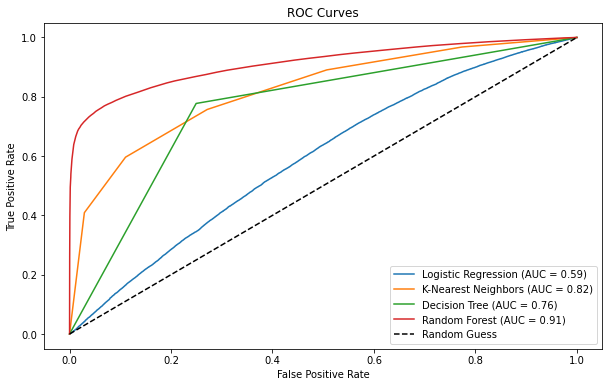

In [41]:
# Plot ROC curves

plt.figure(figsize=(10, 6))
for name, model in models.items():
    if hasattr(model, 'predict_proba'):
        if name == 'K-Nearest Neighbors':
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
        else:
            y_prob = model.predict_proba(X_test)[:, 1]

        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()